In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import svm, datasets, metrics

iris = datasets.load_iris()

In [4]:
#using the SVMs for the iris dataset

classifier = svm.SVC().fit(iris.data, iris.target)
classifier.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
print metrics.classification_report(classifier.predict(iris.data), iris.target)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      1.00      0.98        48
          2       1.00      0.96      0.98        52

avg / total       0.99      0.99      0.99       150



In [10]:
# SVC() is the standard kernel, lets compare with the other kernals 
# top plot things nicely, we will concentrate on just the first 2 features

X =iris.data[:, :2]
Y =iris.target

# to create a plot we need a grid, and therefore we need the size of the grid
h= .02

# we create an instance  for SVM to fit our data

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)
rbf = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,Y)
lin_svc = svm.LinearSVC(C=C).fit(X,Y)


In [16]:
# lets create the mesh
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

# titles for the plots 
titles = ['SVC with linear kernal',
          'SVC with the RBF kernal',
          'SVC with the polynomial (d=3) kernal',
          'LinearSVC (linear kernel)']



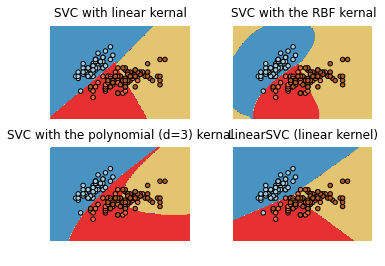

In [19]:
for i, clf in enumerate ((svc, rbf, poly_svc, lin_svc)):
    plt.subplot(2,2,i+1)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired)
    
    plt.title(titles[i])
